In [2]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
perf_data_semilag = []
filenames = ["perf-semilagrangian-state{}.csv".format(i) for i in range(3)]
for filename in filenames:
    perf_data_semilag.append(genfromtxt(filename, delimiter=',', encoding='utf-8').astype(np.float))

perf_data_pic = []
filenames = ["perf-pic-state{}.csv".format(i) for i in range(3)]
for filename in filenames:
    perf_data_pic.append(genfromtxt(filename, delimiter=',', encoding='utf-8').astype(np.float))
    
print(perf_data_semilag[0])

def perf_avg(arr, numStages):
    return np.sum(arr) / arr.shape[0]

def perf_avg_by_stage(arr, numStages):
    avg = np.zeros(numStages, dtype=float)
    for i in range(numStages):
        avg[i] = np.sum(arr[:,i]) / arr.shape[0]
    return avg

avg_by_stage = np.zeros(7, dtype=float)
for perf in perf_data_semilag:
    print(perf_avg(perf, 7))
    avg_by_stage += perf_avg_by_stage(perf, 7)
avg_by_stage /= 3
with np.printoptions(precision=3):
    print(avg_by_stage)
    
avg_by_stage = np.zeros(8, dtype=float)
for perf in perf_data_pic:
    print(perf_avg(perf, 8))
    avg_by_stage += perf_avg_by_stage(perf, 8)
avg_by_stage /= 3
with np.printoptions(precision=3):
    print(avg_by_stage)
    

[[ 7.351532  9.268439  0.02709  ... 13.300996  0.521523  5.711974]
 [ 7.333613  9.214491  0.026836 ... 13.222885  0.516499  5.676074]
 [ 7.3034    9.145814  0.026515 ... 13.116846  0.511482  5.627535]
 ...
 [ 6.772108  7.861602  0.020734 ... 12.123713  0.399103  4.631493]
 [ 6.78488   7.844726  0.020692 ... 12.115239  0.39915   4.633135]
 [ 6.808627  7.851682  0.020697 ... 12.105323  0.400367  4.631547]]
31.127762605780344
27.328102983221477
26.51016031392694
[6.393e+00 7.852e+00 2.129e-02 4.414e-05 9.859e+00 4.415e-01 3.755e+00]
24.57220581919643
20.914793970819307
19.094189015837106
[6.296e+00 9.223e-01 2.115e-02 3.682e-05 9.552e+00 4.604e-01 4.466e-01
 3.829e+00]


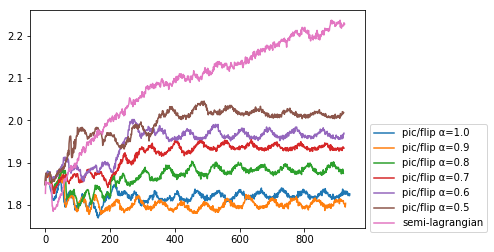

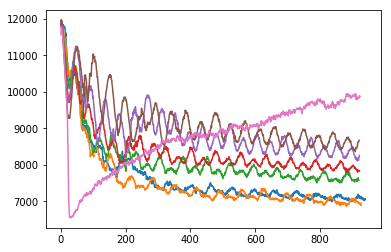

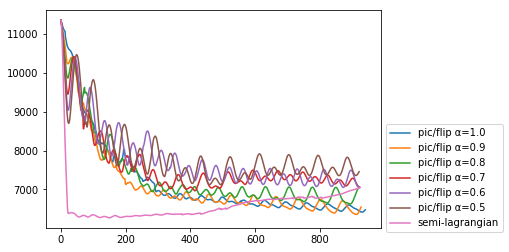

In [8]:
con_data_pic = []
alpha_values = [100, 90, 80, 70, 60, 50]
filenames = ["conservation-pic-alpha{}-state1.csv".format(alpha) 
             for alpha in alpha_values]
filenames.append("conservation-semilag-state1.csv")

for filename in filenames:
    con_data_pic.append(
        genfromtxt(filename, delimiter=',', encoding='utf-8').astype(np.float))
    
for entry_idx in range(3):
    plt.figure(entry_idx)
    for i, data in enumerate(con_data_pic):
        values = data[1:,entry_idx]
        if i < len(con_data_pic) - 1:
            plt.plot(range(values.shape[0]), values,
                     label="pic/flip α={}".format(alpha_values[i]/100.0))
        else:
            plt.plot(range(values.shape[0]), values,
                     label="semi-lagrangian")
    if entry_idx != 1:
        plt.legend(bbox_to_anchor=(1,0.5))
    
plt.show()